In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

Loading the Branded food dataset

In [ ]:
branded_food = pd.read_csv("/content/drive/MyDrive/FoodData_Central_Clean/branded_food.csv")
branded_food.shape

<ipython-input-3-26732e216305>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  branded_food = pd.read_csv("/content/drive/MyDrive/FoodData_Central_Clean/branded_food.csv")


(1958978, 12)

In [ ]:
branded_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958978 entries, 0 to 1958977
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fdc_id                 int64  
 1   brand_owner            object 
 2   brand_name             object 
 3   gtin_upc               object 
 4   ingredients            object 
 5   serving_size           float64
 6   serving_size_unit      object 
 7   branded_food_category  object 
 8   data_source            object 
 9   modified_date          object 
 10  available_date         object 
 11  market_country         object 
dtypes: float64(1), int64(1), object(10)
memory usage: 179.3+ MB


In [ ]:
branded_food.describe()

,fdc_id,serving_size
count,1.958978e+06,1.958978e+06
mean,1.579675e+06,3.469717e+02
std,6.729895e+05,2.587807e+05
min,3.446040e+05,0.000000e+00
25%,1.113183e+06,2.800000e+01
50%,1.615666e+06,4.500000e+01
75%,2.139385e+06,1.130000e+02
max,2.688921e+06,2.561132e+08


In [ ]:
branded_food.head()

,fdc_id,brand_owner,brand_name,gtin_upc,ingredients,serving_size,serving_size_unit,branded_food_category,data_source,modified_date,available_date,market_country
0,1105904,Richardson Oilseed Products (US) Limited,Unknown,27000612323,Vegetable Oil,15.0,ml,Oils Edible,GDSN,2020-10-02,2020-11-13,United States
1,1105905,CAMPBELL SOUP COMPANY,Unknown,51000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",240.0,ml,Herbs/Spices/Extracts,GDSN,2020-09-12,2020-11-13,United States
2,1105906,CAMPBELL SOUP COMPANY,Unknown,51000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",440.0,g,Prepared Soups,GDSN,2020-09-01,2020-11-13,United States
3,1105907,CAMPBELL SOUP COMPANY,Unknown,51000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",440.0,g,Prepared Soups,GDSN,2020-09-01,2020-11-13,United States
4,1105908,CAMPBELL SOUP COMPANY,Unknown,51000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",240.0,ml,Herbs/Spices/Extracts,GDSN,2020-10-03,2020-11-13,United States


Showcase the number of different brands and list the ones that have more then 15,000 occurences.

In [ ]:
brand_counts = branded_food['brand_owner'].value_counts()
print("Number of different brands", len(brand_counts))
filtered_brand_counts = brand_counts[brand_counts > 15000]
print("Brands that have more than 15,000 occurences")
filtered_brand_counts

Number of different brands 37043
Brands that have more than 15,000 occurences


,count
brand_owner,
"Wal-Mart Stores, Inc.",46915
Target Stores,44306
"Meijer, Inc.",31231
"Safeway, Inc.",29484
"Topco Associates, Inc.",26163
The Kroger Co.,23636
"Hy-Vee, Inc.",23176
GENERAL MILLS SALES INC.,22671
"Supervalu, Inc.",18256


Filter out the brands that have more than 30 instances

In [ ]:
category_counts = branded_food["branded_food_category"].value_counts()

In [ ]:
category_percentage = (category_counts/category_counts.sum())*100
category_percentage

,count
branded_food_category,
"Popcorn, Peanuts, Seeds & Related Snacks",4.703881
Candy,4.536600
Cheese,4.149255
Ice Cream & Frozen Yogurt,3.103302
Cookies & Biscuits,2.734793
...,...
Wrapped Snacks - Fruit Bars,0.000051
Eggs Products/Substitutes,0.000051
Cakes/Slices/Biscuits,0.000051


Dropping rows, where the category belongs to a category with less than 1% contribution.

In [ ]:
categories_to_keep = category_percentage[category_percentage>=1].index
filtered_branded_food = branded_food[branded_food['branded_food_category'].isin(categories_to_keep)]c

Pie chart of category distribution

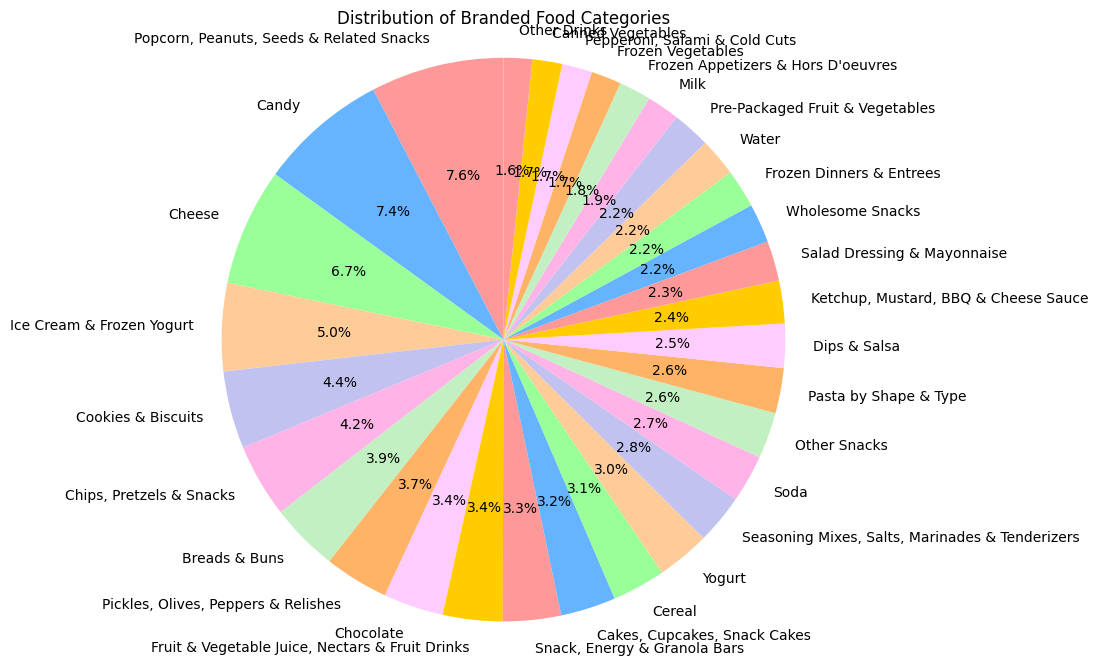

In [ ]:
category_percentage = (filtered_branded_food["branded_food_category"].value_counts() / len(filtered_branded_food)) * 100

colors = [
    '#ff9999',  # Soft red
    '#66b3ff',  # Light blue
    '#99ff99',  # Light green
    '#ffcc99',  # Soft orange
    '#c2c2f0',  # Soft lavender
    '#ffb3e6',  # Soft pink
    '#c2f0c2',  # Light greenish
    '#ffb366',  # Light coral
    '#ffccff',  # Light violet
    '#ffcc00',  # Bright yellow
]

plt.figure(figsize=(8, 8))
plt.pie(category_percentage, labels=category_percentage.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribution of Branded Food Categories")
plt.axis('equal')
plt.show()

Word cloud based on ingredients list

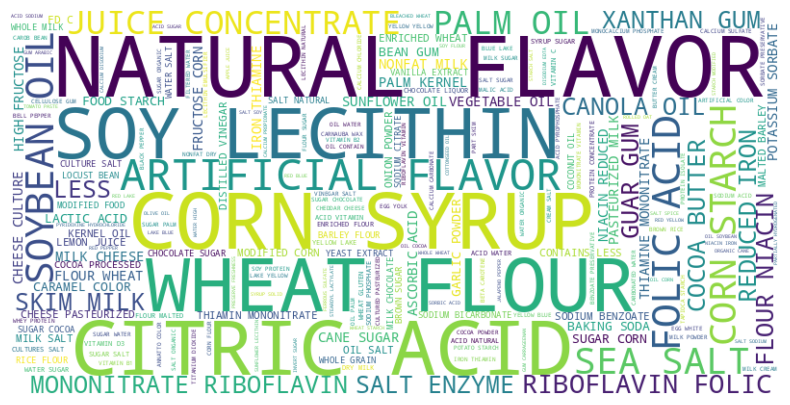

In [ ]:
ingredients_text = " ".join(filtered_branded_food['ingredients'].fillna(""))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Flag products that contain gluten

In [ ]:
# Flagging products containing gluten
filtered_branded_food['contains_gluten'] = filtered_branded_food['ingredients'].apply(lambda x: 'gluten' in x.lower() if pd.notnull(x) else False)

gluten_products = filtered_branded_food[filtered_branded_food['contains_gluten']]
print("Products containing gluten:")
print(gluten_products[['brand_owner', 'ingredients']].head())

Products containing gluten:
                            brand_owner  \
207                 Flowers Foods, Inc.   
267  Bob's Red Mill Natural Foods, Inc.   
280            Maplehurst Bakeries, LLC   
333               Schnuck Markets, Inc.   
342            Chuckanut Bay Foods, LLC   

                                           ingredients  
207  ENRICHED WHEAT FLOUR (FLOUR, MALTED BARLEY FLO...  
267  GLUTEN FREE WHOLE GRAIN OATS, BROWN SUGAR, CAN...  
280  WATER, ENRICHED FLOUR(EHEAT FLOUR, MALTED BARL...  
333  ENRICHED FLOUR (WHEAT FLOUR, MALTED BARLEY FLO...  
342  CREAM CHEESE (PASTEURIZED CULTURED MILK AND CR...  


<ipython-input-16-cf303507560a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['contains_gluten'] = filtered_branded_food['ingredients'].apply(lambda x: 'gluten' in x.lower() if pd.notnull(x) else False)


Number of products available VS Monthly distribution

<ipython-input-17-cc1cab5c80c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['available_date'] = pd.to_datetime(filtered_branded_food['available_date'])
<ipython-input-17-cc1cab5c80c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['available_month'] = filtered_branded_food['available_date'].dt.month


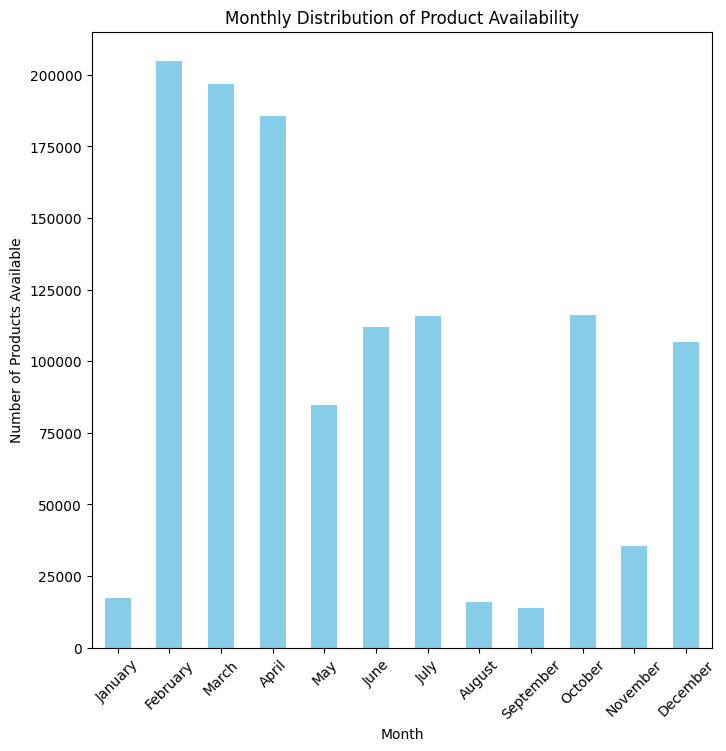

In [ ]:
filtered_branded_food['available_date'] = pd.to_datetime(filtered_branded_food['available_date'])

filtered_branded_food['available_month'] = filtered_branded_food['available_date'].dt.month
monthly_distribution = filtered_branded_food['available_month'].value_counts().sort_index()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
monthly_distribution.index = [month_names[month - 1] for month in monthly_distribution.index]

plt.figure(figsize=(8, 8))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Number of Products Available")
plt.title("Monthly Distribution of Product Availability")
plt.xticks(rotation=45)
plt.show()

Top 3 ingredients based on the product category

In [ ]:
def top_ingredients_by_category(df, category):
    category_df = filtered_branded_food[filtered_branded_food['branded_food_category'] == category]

    all_ingredients = " ".join(category_df['ingredients'].dropna()).lower()

    ingredient_list = all_ingredients.replace(",", " ").replace(":", " ").split()
    ingredient_counts = Counter(ingredient_list)

    top_3_ingredients = ingredient_counts.most_common(3)
    return [ingredient for ingredient, count in top_3_ingredients]

categories = filtered_branded_food['branded_food_category'].unique()
top_ingredients = {category: top_ingredients_by_category(filtered_branded_food, category) for category in categories}

print("Top 3 ingredients in each category:")
for category, ingredients in top_ingredients.items():
    print(f"{category}: {', '.join(ingredients)}")

Top 3 ingredients in each category:
Cookies & Biscuits: flour, oil, sugar
Popcorn, Peanuts, Seeds & Related Snacks: oil, salt, sugar
Frozen Appetizers & Hors D'oeuvres: salt, flour, water
Wholesome Snacks: organic, acid, sugar
Chips, Pretzels & Snacks: oil, powder, salt
Cheese: salt, milk, cheese
Frozen Vegetables: green, organic, salt
Frozen Dinners & Entrees: salt, water, cheese
Snack, Energy & Granola Bars: organic, protein, oil
Breads & Buns: flour, wheat, calcium
Seasoning Mixes, Salts, Marinades & Tenderizers: salt, garlic, and
Ketchup, Mustard, BBQ & Cheese Sauce: salt, vinegar, water
Chocolate: milk, chocolate, cocoa
Dips & Salsa: salt, garlic, organic
Ice Cream & Frozen Yogurt: gum, milk, sugar
Cereal: vitamin, (vitamin, sugar
Salad Dressing & Mayonnaise: salt, vinegar, oil
Yogurt: milk, l., natural
Fruit & Vegetable Juice, Nectars & Fruit Drinks: juice, concentrate, acid
Pasta by Shape & Type: flour, cheese, salt
Pre-Packaged Fruit & Vegetables: organic, salt, red
Candy: suga

Flagging products that contain sugar

In [ ]:
# flagging products that contain sugar
filtered_branded_food['contains_sugar'] = filtered_branded_food['ingredients'].apply(lambda x: 'sugar' in x.lower() if pd.notnull(x) else False)

sugar_products = filtered_branded_food[filtered_branded_food['contains_sugar']]
print("Products containing sugar:")
print(sugar_products[['brand_owner', 'ingredients']].head())

Products containing sugar:
                            brand_owner  \
175                 Pura Stainless LLC    
179  Dr. Praeger's Sensible Foods, Inc.   
181                      Productos Hola   
192            Pinnacle Foods Group LLC   
200                 Osi Industries, LLC   

                                           ingredients  
175  ORGANIC WHEAT FLOUR, ORGANIC AGAVE, ORGANIC BU...  
179  FILLING (CARROTS, ONIONS, STRING BEANS, SOYBEA...  
181  DRIED PLUMS, PUNFIED WATER, SUGAR, LODIZED SAL...  
192       SUGAR SNAP PEAS, CARROTS, ONIONS, MUSHROOMS.  
200  MEAT SAUCE: TOMATO PUREE, WATER, GROUND BEEF, ...  


<ipython-input-19-cbc289e7d0f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['contains_sugar'] = filtered_branded_food['ingredients'].apply(lambda x: 'sugar' in x.lower() if pd.notnull(x) else False)


Standardizing the serving unit and size

In [ ]:
# standardize serving unit and size, by making them all oz, instead of g and ml

filtered_branded_food['serving_size'] = filtered_branded_food.apply(
    lambda row: row['serving_size'] * 0.03527 if row['serving_size_unit'] == 'g'
    else row['serving_size'] * 0.03381 if row['serving_size_unit'] == 'ml'
    else row['serving_size'],  # If already in oz
    axis=1
)

# Update the unit to 'oz'
filtered_branded_food['serving_size_unit'] = 'oz'

<ipython-input-20-b69128bf6799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['serving_size'] = filtered_branded_food.apply(
<ipython-input-20-b69128bf6799>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branded_food['serving_size_unit'] = 'oz'


Top 10 brands based on the number of products

<ipython-input-21-f45f13b284a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branded_food_without_unknown_counts.index, y=branded_food_without_unknown_counts.values, palette='coolwarm')


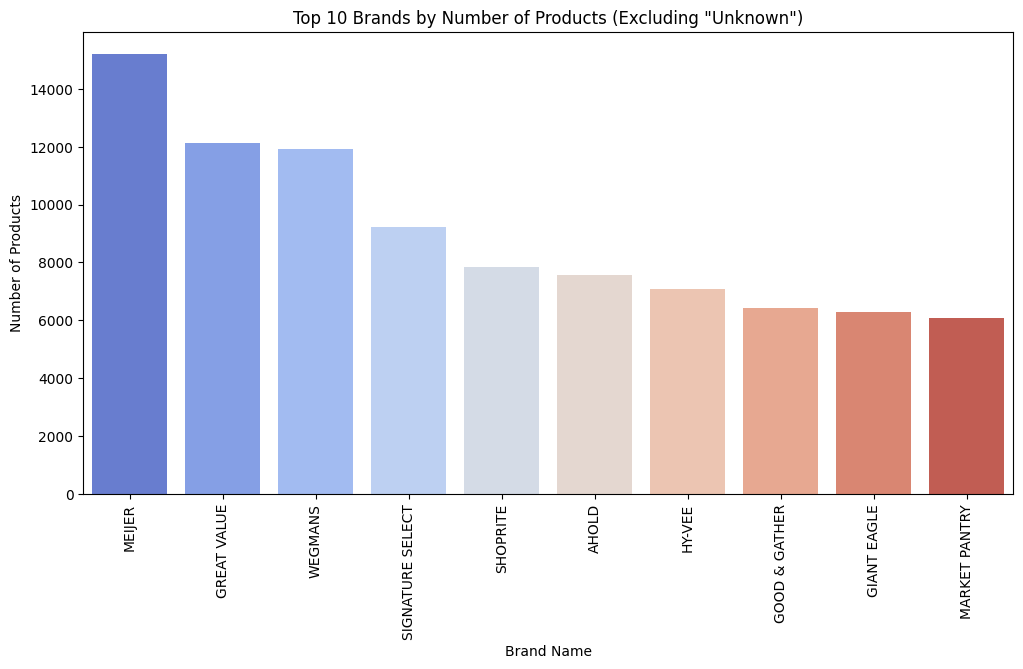

In [ ]:
branded_food_without_unknown = filtered_branded_food[filtered_branded_food['brand_name'] != 'Unknown']

branded_food_without_unknown_counts = branded_food_without_unknown['brand_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=branded_food_without_unknown_counts.index, y=branded_food_without_unknown_counts.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.title('Top 10 Brands by Number of Products (Excluding "Unknown")')
plt.show()